# General equilibrium

## Consumption & labor supply

In the previous lecture, we discussed the consumption & labor supply problem in *partial equilibrium*, i.e., we assumed that the wage was exogenously fixed, and we characterized optimal household choices for this given wage. We now extend this setting to a production economy and study how wages (and the interest rate) are determined in *general equilibrium*.


### Household problem

As before, we assume that households have preferences given by
$$
u(c,h) = \frac{c^{1-\gamma} - 1}{1-\gamma} - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
$$
where $c \geq 0$ is the amount consumed, and $h \geq 0$ (for "hours") is the amount of labor the household wishes to work (the remaining time is then consumed as leisure). 
Assume that households have initial assets $a$ which come in the form of productive capital that enters the production function. The household's budget constraint is therefore given by
$$
c = r \cdot a + w \cdot h
$$
For simplicity, we ignore any savings decision here and assume that households
have the same fixed stock of $a$ each period, which is set exogenously as a parameter.

Since all households are identical in this setup, we model the household sector of this economy as a single representative household.

### Firm problem

There are two factors of production, capital $K$ and labor $L$, which are supplied to firms by households. We assume that the production function has
the 
[Cobb-Douglas form](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function),
$$
Y = z K^{\alpha} L^{1-\alpha}
$$
where $\alpha > 0$ is the elasticity with respect to capital (or the capital share in output), and $z$ is total factor productivity (TFP). Each firm is assumed to maximize profits $\Pi$, which are simply its revenue net of production costs,
$$
\max_{K,~L} \enskip \Pi = z K^{\alpha} L^{1-\alpha} - r K - w L
$$
where one unit of capital commands a return of $r$, and one unit of labor is paid a wage $w$. We normalize the price of the output to one so that revenue and output are identical.

Taking derivatives with respect to $K$ and $L$, we obtain the first-order conditions (FOCs) for the firm's problem:
$$
\begin{aligned}
r &= \alpha z \left(\frac{K}{L}\right)^{\alpha-1} = \alpha z k^{\alpha-1} \\
w &= (1-\alpha) z\left(\frac{K}{L}\right)^{\alpha} = (1-\alpha) z k^{\alpha}
\end{aligned}
$$
where we define the capital-labor ratio as $k \equiv \frac{K}{L}$.
The equation for $w$ can be inverted to get the firm's labor demand function 
<a id='eq-ls-firm-L'></a>
$$
L = \left( \frac{w}{(1-\alpha) z} \right)^{-\frac{1}{\alpha}}K
    \tag{1.1}
$$
for given $w$ and $K$. We'll be using this equation in the code below.

Note that the production function has *constant returns to scale*: doubling inputs $(K,L)$ doubles output.
In addition, we assume that input and output markets are perfectly competitive. In this setting, firms make zero profits,
and we can model the production sector of the economy as a single representative firm
without loss of generality.

### Equilibrium

The general equilibrium in this economy is a set of quantities $(K,L,Y,c,h)$ and prices $(r,w)$ 
which solve the household's and firm's problem
such that the following market clearing conditions are satisfied:

- Asset market: $K = a$ (capital $a$ supplied by households equals capital $K$ demanded by firms).
- Labor market: $L = h$ (hours $h$ supplied by households equals labor $L$ demanded by firms).
- Goods market: $Y = c$ (the amount of goods $c$ consumed by households equals aggregate output).

Due to Walras' Law, we only have to make sure that two of these markets clear as 
this implies market clearing in the residual market. 

### Analytical solution

Recall the household's first-order condition from the previous lecture: 
$$
c^{-\gamma} = \psi \frac{h^{1/\theta}}{w}
$$
This
condition links optimal consumption to optimal labor supply
and must hold in equilibrium.

By substituting in the firm's FOCs and market clearing conditions, we 
can rewrite it as a single equation in $L$, which can then be solved for 
equilibrium.

1. From the firm's problem, wages can alternatively be written as 
    $$
    w = (1-\alpha) \frac{Y}{L}
    $$
2. Using this expression and the market clearing conditions $c=Y$ and $h=L$,
we obtain
    $$
    Y^{-\gamma} = \psi \frac{L^{1/\theta}}{(1-\alpha)\frac{Y}{L}}
    \Longleftrightarrow (1-\alpha) Y^{1-\gamma}
    = \psi L^{1 + 1/\theta}
    $$
3. Using capital market clearing $a=K$, from the firm's problem we have
    $$
    Y = z a^{\alpha} L^{1-\alpha}
    $$
    which can be used to substitute out $Y$ to obtain
    $$
    (1-\alpha) \left(z a^{\alpha}\right)^{1-\gamma} L^{(1-\alpha)(1-\gamma)}
    = \psi L^{1 + 1/\theta}
    $$
4. Collecting terms, we find that equilibrium $L$ is pinned down by
    $$
    L = \left[ \frac{(1-\alpha)\left(z a^{\alpha}\right)^{1-\gamma}}{\psi} 
        \right]^{\frac{1}{1/\theta + \alpha + \gamma - \alpha \gamma}}
    $$

We can use this expression to verify that our numerical solution is correct.

### Numerical solution

Even though this problem has an analytical solution, we now study how to find the equilibrium numerically. While this is not necessary in this case, the structure of the algorithm directly translates to more complex settings which don't have a closed-form solution.

When implementing a numerical solution, we need to decide how to incorporate any 
analytical results into our algorithm. Usually, we'd want to incorporate 
as many analytical equilibrium conditions as possible since 
this speeds up the computation and gives more precise results. In particular,

- We *never* solve **firm problems** such as this one numerically since the 
  solution (given by the firm's first-order conditions) is trivial and well known.

- We often have to solve the **household problem** numerically as more complicated
  household problems don't have an analytical solution.
  This is usually accomplished using a *minimizer*.

- We usually have to solve for the **equilibrium** price vector $(w, r)$ numerically
  as there are no closed-form solutions except for trivial cases. 
  We usually do this using a *root finder* which varies the candidate equilibrium
  price until it finds a price vector with zero excess demand.

#### Solution algorithm

Our implementation to find the equilibrium in this economy proceeds as follows:

1.  Define a class to store the problem's parameters.

2.  Write a function to solve the household problem for given $(w, r)$ which returns 
    the optimal labor supply $h$ (use a minimizer).

3.  Write a function to solve the firm problem for given $w$ which returns the firm labor demand $L$ 
    (use the firm's first-order conditions).

4.  Write a function $f(w)$ which returns the excess labor demand for a given $w$, defined 
    as $L - h$.
    We use the functions from steps (2) and (3) to compute $h$ and $L$.
    
5.  Make an initial guess for the equilibrium wage rate $w_0$ and call the root finder
    to locate the root of $f$.
    The root finder will repeatedly call $f$ to find equilibrium $w^*$.

6.  Once the root finder terminates and returns equilibrium $w^*$,
    compute and store all other equilibrium quantities and prices.

#### Implementation

##### Step 1: Define parameters

As this is a more complex example, it is preferable to place the implementation in the separate Python module 
[`lecture06_labor.py`](lecture06_labor.py).
For expositional convenience, the following code segments replicate selected code blocks from that file.

As a first step, we define a 
[`dataclass`](https://docs.python.org/3/library/dataclasses.html)
called `Parameters` to store the problem parameters. This is more convenient and less error-prone than passing a whole set of scalar parameter values to each function when the
number of parameters grows large.

We won't be concerned with the details of what a data class is, so 
you can just copy this declaration and adapt it to a specific problem.
Basically, each line of the `class` body defines a model parameter using the syntax:
```
name: type = value
```
where the `type` is a Python type (usually `float`, `int`, `np.ndarray`, ...)
and `value` is the default value given to this parameter.

In [1]:
# Enable automatic reloading of external modules
%load_ext autoreload
%autoreload 2

For the problem outlined above, the definition of the `Parameters` data class looks as follows:

In [2]:
from dataclasses import dataclass

@dataclass
class Parameters:
    """
    Container to store the problem's parameters.
    """
    alpha: float = 0.36     # Capital share in production function
    z: float = 1.0          # TFP 
    gamma: float = 2.0      # Relative risk aversion (RRA) in utility
    psi: float = 1.0        # Weight on disutility of working
    theta: float = 0.5      # Frisch elasticity of labor supply
    a: float = 5.0          # Initial assets (capital)

A parameter *object* (also called *instance*) can then be created by calling the constructor `Parameters()`:

In [3]:
# Create instance of parameter class
par = Parameters()

Individual model parameters can be accessed (and changed!) as attributes of this object, for example:

In [4]:
# Print alpha parameter value
par.alpha

0.36

Note that you can also change any of the parameters as follows:

In [5]:
# Use log preferences
par.gamma = 1.0

Finally, the `Parameters` instance can be initialized with parameter values that differ from the defaults by specifying them as keyword arguments: 

In [6]:
# Create Parameter instance with custom values
par = Parameters(alpha=0.36, gamma=2.0)

##### Step 2: Solving the household problem

Now that you know how to work with data classes, we define the utility function for the household problem. This is the same implementation that we have used repeatedly in this course, but it now takes a `par` argument which contains all the problem's parameters in the `Parameters` object.

In [7]:
import numpy as np

def util(c, h, par: Parameters):
    """
    Compute the utility of a given consumption/labor supply choice.

    Parameters
    ----------
    c : float
        Consumption
    h : float
        Hours worked
    par : Parameters
        Parameters for given problem

    Returns
    -------
    u : float
        Utility level

    """

    # Consumption utility
    if par.gamma == 1:
        # Log utility
        u = np.log(c)
    else:
        # General CRRA utility
        u = (c**(1-par.gamma) - 1) / (1-par.gamma)

    # add disutility of labor
    u -= par.psi * h**(1 + 1/par.theta) / (1 + 1/par.theta)

    return u

With the utility function in hand, we implement the function `solve_hh()` which solves the household problem for given prices $(r,w)$ and parameters.

For this purpose, we use the 
[L-BFGS-B minimizer](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) 
from the 
`scipy.optimize` module. The advantage of this algorithm over 
[`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)
is that we don't need to provide an initial bracket (which might
depend on prices and parameters) but can instead specify 
an initial guess using the argument `x0`.

Note that the L-BFGS-B algorithm supports bounds, which we 
specify as the vector `(0, None)` to impose a lower bound $h \geq 0$. Since $h$ has no upper bound, this is indicated by the second value being `None`. These bounds have to be specified as a nested tuple
because [`minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) implements a multivariate minimizer, so each dimension has its own tuple of bounds (we don't use this feature here).

In [8]:
from scipy.optimize import minimize

def solve_hh(r, w, par: Parameters):
    """
    Solve household problem for given prices and parameters

    Parameters
    ----------
    r : float
        Return on capital
    w : float
        Wage rate
    par : Parameters
        Parameters for given problem

    Returns
    -------
    c_opt : float 
        Optimal consumption choice
    h_opt : float
        Optimal hours choice
    """

    # Initial guess for h
    h_guess = 0.5

    # Run minimizer to find optimal hours.
    # The budget constraint is inserted directly in the lambda expression.
    res = minimize(
        lambda h: -util(r*par.a + w * h, h, par),
        x0=h_guess,
        method='L-BFGS-B',
        bounds=((0, None), )
    )

    if not res.success:
        print('Minimizer did not terminate successfully')
        print(res.message)
        print(f'  Prices: {r}, {w}')

    # Recover optimal hours choice
    h_opt = res.x[0]
    # Optimal consumption follows from budget constraint
    c_opt = r * par.a + w * h_opt

    return c_opt, h_opt

<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>

Plot the optimal hours <i>h</i> returned by <tt>solve_hh()</tt> 
for <tt>w</tt> on the interval [0.5, 2]. Fix the interest rate at <i>r=0.1</i> for this exercise. Does the shape intuitively make sense?
</div>
<span style="display: none;">YourTurnEnd</span>

##### Step 3: Solving the firm problem

Next, we implement the function `solve_firm()` which returns the firm's labor demand $L$ for a given wage rate $w$, computed
from the formula in [(1.1)](#eq-ls-firm-L).
For convenience, this function also returns output $Y$ and the interest rate $r$ implied by $w$, which is required to solve the household problem.

In [9]:
def solve_firm(w, par: Parameters):
    """
    Return the solution to the firm's problem for given wage rate and parameters.

    Parameters
    ----------
    w : float
        Wage rate
    par : Parameters
        Parameters for given problem

    Returns
    -------
    L : float
        Firm labor demand
    Y : float
        Firm output
    r : float
        Interest rate implied by wage rate

    """

    # Capital market clearing condition
    K = par.a

    # Labor demand implied by firm FOC
    L = (w / (1-par.alpha) / par.z)**(-1/par.alpha) * K

    # Optimal capital-labor ratio
    k = K / L

    # Return on capital
    r = par.z * par.alpha * k**(par.alpha - 1)

    # Output
    Y = par.z * K**par.alpha * L**(1-par.alpha)
    
    return L, Y, r

<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>

Plot the firm's optimal labor demand <i>L</i> returned by <tt>solve_firm()</tt> 
for <tt>w</tt> on the interval [0.5, 2]. Does the shape intuitively make sense?
</div>
<span style="display: none;">YourTurnEnd</span>

##### Step 4: Compute excess demand for labor

Lastly, we implement the function to be called by the root finder which returns the excess demand for labor, $L-h$:

In [10]:
def compute_labor_ex_demand(w, par: Parameters):
    """
    Compute excess labor demand for given wage rate and parameters.

    Parameters
    ----------
    w : float
        Wage rate
    par : Parameters
        Parameters for given problem

    Returns
    -------
    ex_demand : float 
        Excess labor demand (firm demand minus household supply)
    """

    # Solve firm problem for given wage rate
    L, Y, r = solve_firm(w, par)

    # Optimal household choices for given prices
    c_opt, h_opt = solve_hh(r, w, par)

    # Excess demand for labor
    ex_demand = L - h_opt

    return ex_demand

<div style="background-color: #c6dbef; color: #363636; padding: 0.8em 1em 0.5em 1em; border: 1pt solid #363636;">
<h3 style="font-weight: bold;">Your turn</h3>

Before running the root finder, we want to visually verify that the excess demand for 
labor is indeed zero for some <tt>w</tt>.

Using the code we just wrote, plot the function <tt>compute_labor_ex_demand()</tt> 
for <tt>w</tt> on the interval [0.5, 2].
</div>
<span style="display: none;">YourTurnEnd</span>

##### Step 5: Call root finder to find equilibrium

Now that our implementation is complete, we call 
[`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)
to find the root of `compute_labor_ex_demand()`, i.e., 
to find the equilibrium wage $w$ where the excess demand for labor is zero.

We use the `'newton'` method with an initial guess `x0=1`, but could have opted for a bracket-based root finder such as the default `'brentq'` method as well.

In [11]:
from scipy.optimize import root_scalar

# Initial guess for equilibrium wage rate
w0 = 1

# Call root finder. Note that we use args to pass additional arguments.
res = root_scalar(
    compute_labor_ex_demand, x0=w0, method='newton', args=(par, )
)

It is a good idea to inspect the result object to make sure that the algorithm exited successfully, which is the case here.

In [12]:
# Inspect root finder result
res

      converged: True
           flag: converged
 function_calls: 18
     iterations: 9
           root: 1.2643421155116474
         method: newton

##### Step 6: Compute remaining equilibrium quantities

So far, we have only identified the equilibrium wage $w$ but not the other quantities and prices. To store all these, it is convenient to define another data class containing these equilibrium values as attributes:

In [13]:
@dataclass
class Equilibrium:
    """
    Container to store equilibrium allocations and prices.
    """
    par: Parameters = None  # Parameters used to compute equilibrium
    c: float = None         # Optimal consumption
    h: float = None         # Optimal hours
    r: float = None         # Interest rate
    w: float = None         # Wage rate
    L: float = None         # Labor demand
    K: float = None         # Capital demand
    Y: float = None         # Output

The file 
[`lecture06_labor.py`](lecture06_labor.py)
contains two additional helper functions which compute and print the equilibrium allocation and prices.

In [14]:
# Import helper functions from module
from lecture06_labor import compute_equilibrium, print_equilibrium

# Compute equilibrium, return Equilibrium object
eq = compute_equilibrium(par)

# Print equilibrium allocation and prices
print_equilibrium(eq)

Equilibrium:
  Households:
    c = 1.49042
    h = 0.75444
  Firms:
    Y = 1.49042
    L = 0.75444
    K = 5.00000
  Prices:
    r = 0.10731
    w = 1.26434
  Market clearing:
    Labor market: -4.90011e-10
    Goods market: 6.19542e-10


As you can see, market clearing holds at the equilibrium price vector with only negligible excess demand due to limited numerical precision.

### Comparative statics

The `compute_equilibrium()` function allows us to quickly evaluate equilibria for various parameter values. For example, let's assume we are interested in how equilibrium quantities and prices change as a function of the capital stock $K = a$ as we vary parameter $a$.
We can perform the analysis as follows:

In [15]:
# Solve for 30 equilibria with uniformly spaced assets a
N = 30
a_grid = np.linspace(1.0, 10.0, N)

equilibria = []

for i, a in enumerate(a_grid):
    # Solve for new equilibrium using new Parameters instance
    eq_ = compute_equilibrium(par=Parameters(a=a))

    # Append to list of equilibria
    equilibria.append(eq_)

We should check that all these equilibria were computed correctly, e.g., by inspecting the market clearing conditions for the labor and goods markets:

In [16]:
# Print max. absolute error in labor market clearing
max(abs(eq.L - eq.h) for eq in equilibria)

np.float64(1.0116618875954941e-08)

In [17]:
# Print max. absolute error in goods market clearing
max(abs(eq.c - eq.Y) for eq in equilibria)

np.float64(1.5103167161356623e-08)

These figures indicate that market clearing holds in all of the computed equilibria.

Next, we collect the equilibrium allocations and prices from the individual equilibrium objects for each $a$:

In [18]:
c_eq_grid = np.array([eq.c for eq in equilibria])
h_eq_grid = np.array([eq.h for eq in equilibria])
w_eq_grid = np.array([eq.w for eq in equilibria])
r_eq_grid = np.array([eq.r for eq in equilibria])

These can then be plotted as follows:

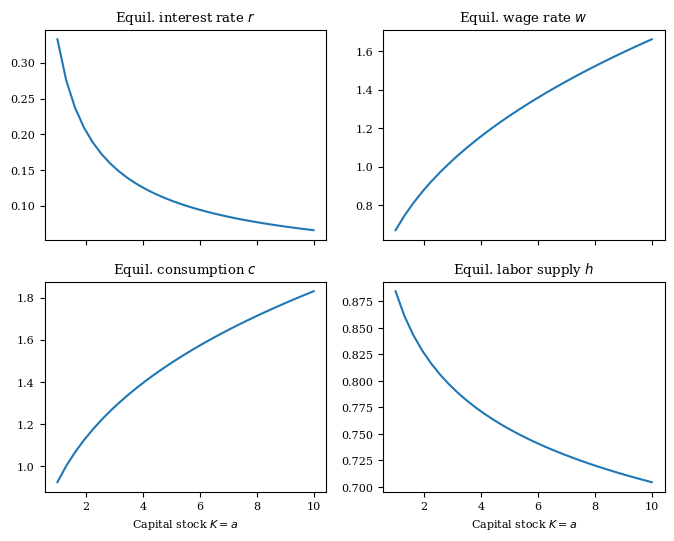

In [19]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2, 2, figsize=(8,6), sharex=True)

ax[0, 0].plot(a_grid, r_eq_grid)
ax[0, 0].set_title('Equil. interest rate $r$')

ax[0, 1].plot(a_grid, w_eq_grid)
ax[0, 1].set_title('Equil. wage rate $w$')

ax[1, 0].plot(a_grid, c_eq_grid)
ax[1, 0].set_xlabel('Capital stock $K = a$')
ax[1, 0].set_title('Equil. consumption $c$')

ax[1, 1].plot(a_grid, h_eq_grid)
ax[1, 1].set_xlabel('Capital stock $K = a$')
_ = ax[1, 1].set_title('Equil. labor supply $h$')

As the graphs show, the equilibrium interest rate $r$ is decreasing in $K$, which follows directly from the firm's first-order condition, while the wage $w$ is increasing. Despite the increase in wages, the labor supply drops as a function of $K$. This is because with a risk-aversion of $\gamma = 2$, the income effect of wage increases dominates and households thus reduce their labor supply. 